In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
path = '/Users/tae/Desktop/Project/image/2Grape_Black_rot/*'



In [1]:
def convert_gray(image):
    r =image[:,:,0]
    g = image[:,:,1]    
    b = image[:,:,2]

    return 0.2990 * r  + 0.5870 * g + 0.1140 * b


In [6]:
def unique(data):
    value , freq = np.unique(np.array(data) , return_counts = 'True')
    
    plt.plot(freq , value)
    plt.show()

    return value , freq

In [8]:
def extract(image_gray):
    
    y = image_gray.shape[0]
    x = image_gray.shape[1]
    
    array = []
    array_nml = []
    coordinate = []
    
    for height in range(y):
        for width in range(x):
            array.append(image_gray[height,width])
            coordinate.append((height,width))
            
    #Nomarlize
    MIN = min(array)
    MAX = max(array)

    for i in array:
        result = (i- MIN) / (MAX-MIN)
        array_nml.append(result)
    
    
    
    return np.array(array_nml)

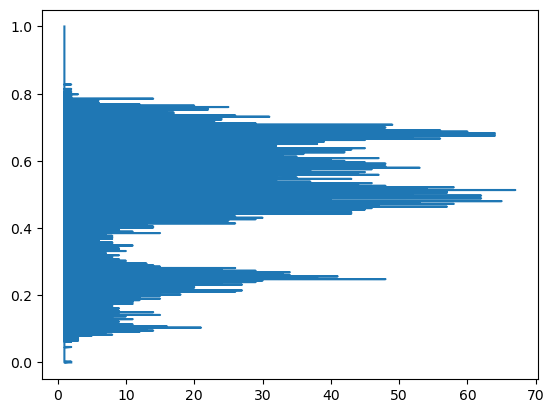

67


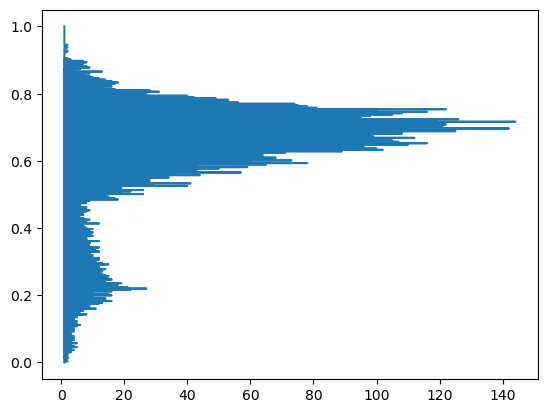

144


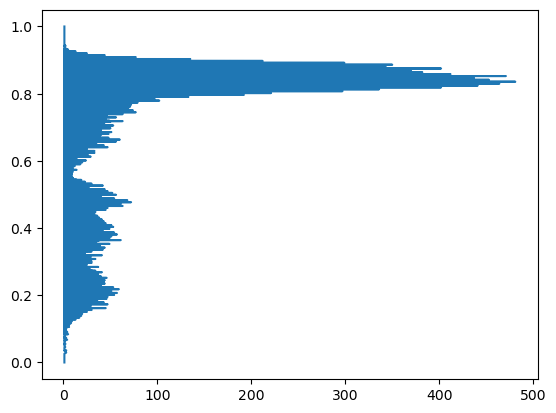

481


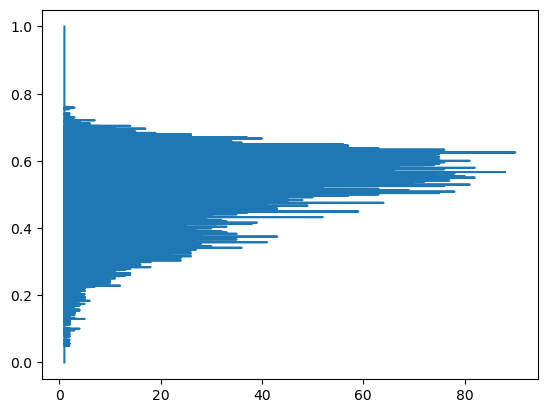

90


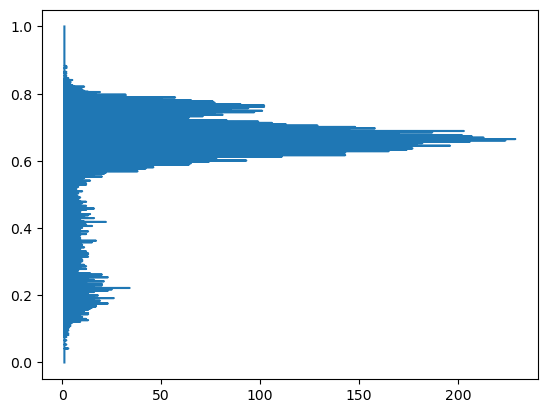

229


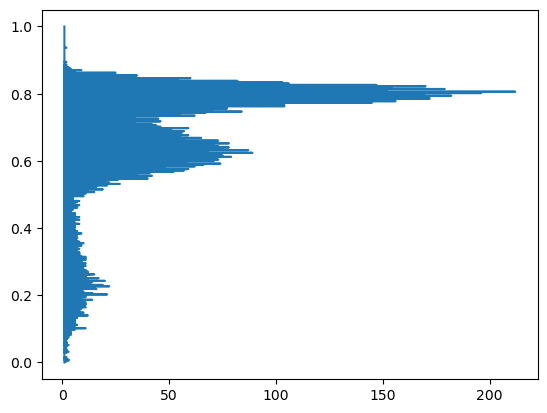

212


In [11]:
# Main
all_image = glob.glob(path)
cell_result = np.empty((6 ,2)  , dtype='object')

for i in range(6):
    
    gray = convert_gray(plt.imread(all_image[i]))
    nml_gray = extract(gray)
    value , freq = unique(nml_gray)
    
    print(np.max(freq))
    cell_result[i,0] = value
    cell_result[i,1] = freq
    
    

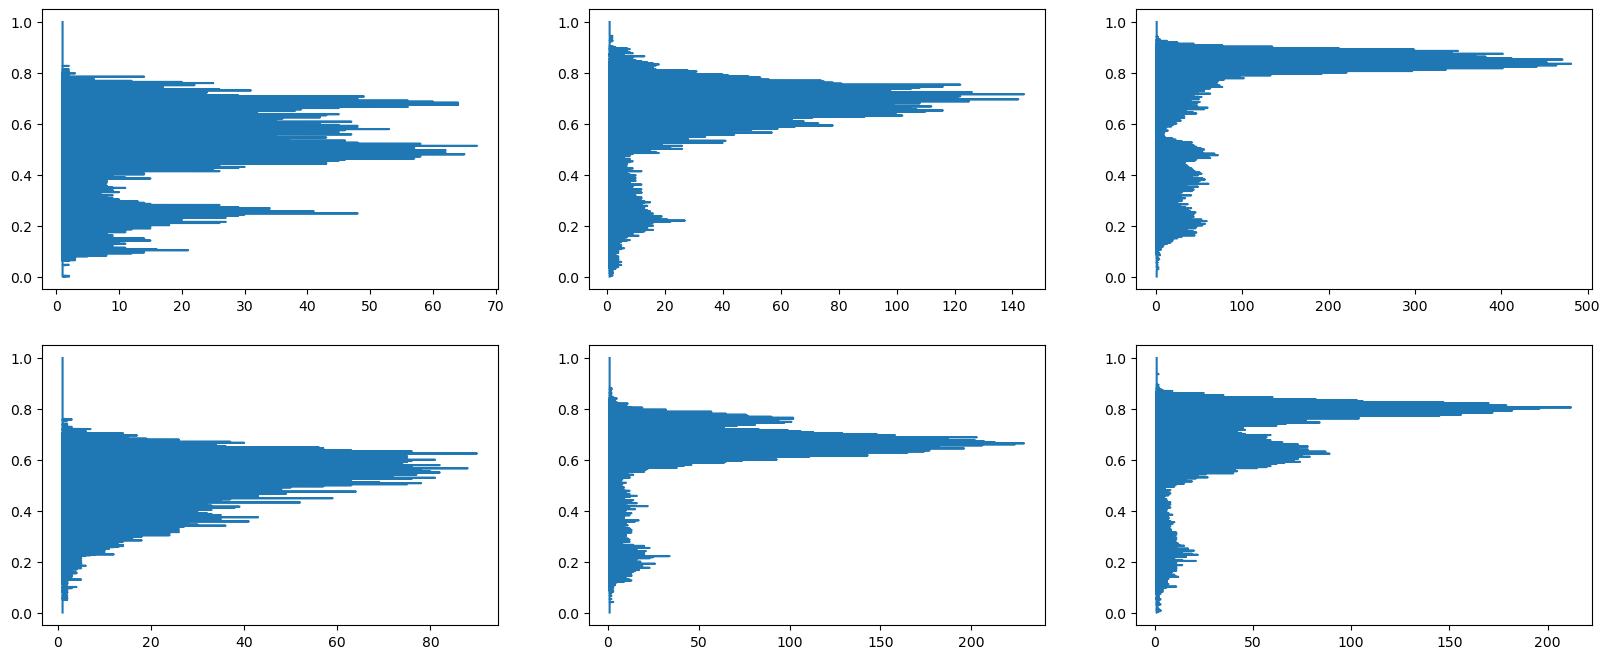

In [12]:
count = 0
fig, axes = plt.subplots(2,3 , figsize=(20, 8))

for i in range(2):
    for j in range(3):
        
        if count < len(cell_result): 
            ax = axes[i, j] 
            ax.plot(cell_result[count , 1] , cell_result[count, 0])
            count += 1  

plt.show()
